In [1]:
import numpy as np



In [2]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [3]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 < x - y < 6:
        return y * (x - y) / 441
    else:
        return 0

XY = [x_set, y_set, f_XY]


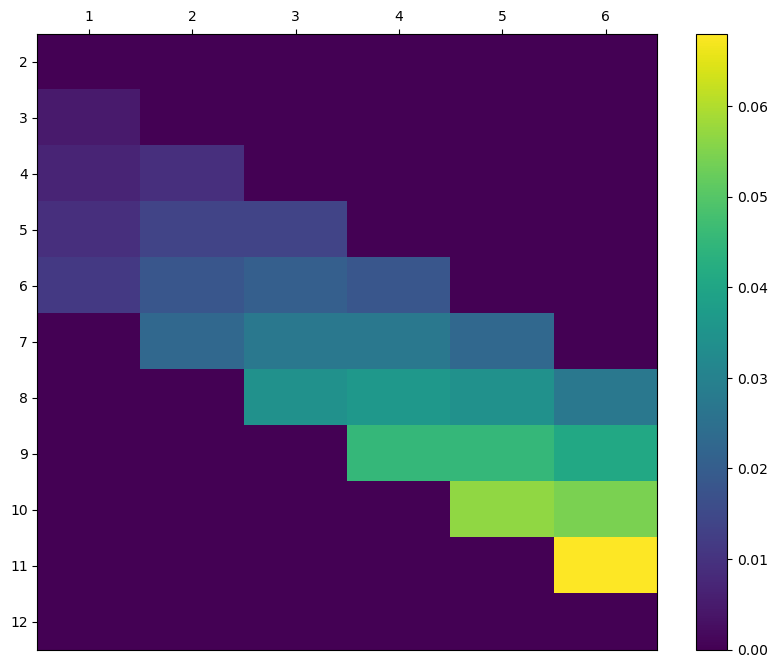

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

def f_XY(x, y):
    if 1 <= y <= 6 and 1 < x - y < 6:
        return y * (x - y) / 441
    else:
        return 0

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [7]:
np.all(prob>=0)

np.True_

In [8]:
np.sum(prob)

np.float64(0.6666666666666667)

In [9]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

X = [x_set, f_X]
Y = [y_set, f_Y]

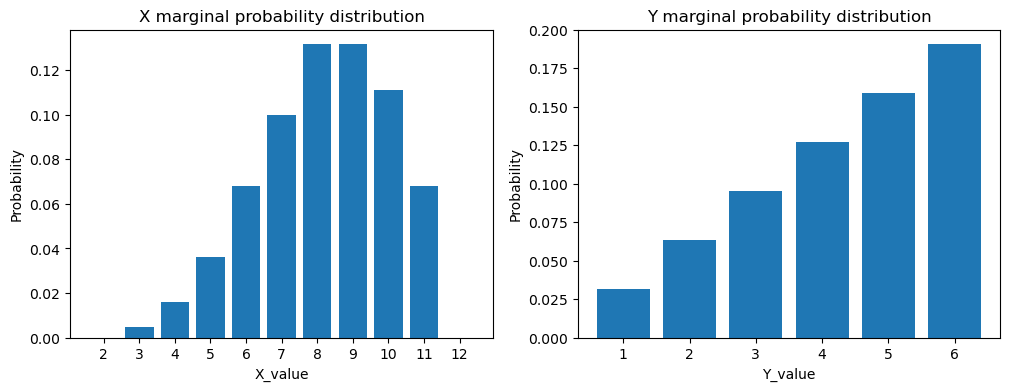

In [10]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title("X marginal probability distribution")
ax1.set_xlabel("X_value")
ax1.set_ylabel("Probability")
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title("Y marginal probability distribution")
ax2.set_xlabel("Y_value")
ax2.set_ylabel("Probability")

plt.show()

In [12]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

np.float64(5.4603174603174605)

In [13]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [15]:
mean_X = E(XY, lambda x, y : x)
mean_X

np.float64(5.4603174603174605)

In [16]:
mean_Y = E(XY, lambda x, y : y)
mean_Y

np.float64(2.8888888888888884)

In [17]:
a, b = 2, 3

In [20]:
E(XY, lambda x, y: a*x + b*y)

np.float64(19.58730158730159)

In [21]:
mean_Y = E(XY, lambda x, y : y)
mean_Y
a * mean_X + b*mean_Y

np.float64(14.444444444444441)

In [23]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_i)
        for x_i in x_set for y_i in y_set])

np.float64(20.967666078777192)

In [24]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)

    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [26]:
var_X = V(XY, g = lambda x, y : x)
var_X

np.float64(7.198958595783991)

In [27]:
var_Y = V(XY, g = lambda x, y : y)
var_Y

np.float64(2.8724279835390956)

In [28]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

cov_xy = Cov(XY)
cov_xy

np.float64(4.110523221634334)

In [29]:
V(XY, lambda x, y: a*x + b*y)

np.float64(103.97396489459979)

In [30]:
a**2 * var_X + var_Y+2*a*b * cov_xy

np.float64(80.99454102628707)

In [31]:
cov_xy / np.sqrt(var_X*var_Y)

np.float64(0.9039360223649947)